In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### Data

In [2]:
features, labels = make_moons(n_samples=5000, random_state=42, noise=0.1)

In [3]:
features.shape, labels.shape

((5000, 2), (5000,))

In [4]:
features[:5]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

In [5]:
labels[:5]

array([0, 1, 1, 0, 0], dtype=int64)

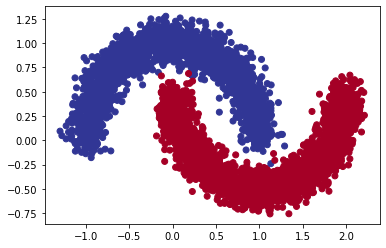

In [6]:
plt.scatter(features[:,0], features[:,1], c = labels, cmap = plt.cm.RdYlBu_r)

### Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(X_train.shape[1],))) # I/P
model.add(keras.layers.Dense(100, activation='relu')) # H1
model.add(keras.layers.Dense(100, activation='relu')) # H2
model.add(keras.layers.Dense(2, activation='softmax')) # O/P

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ['accuracy'])

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9469 - val_loss: 0.0128 - val_accuracy: 0.9952
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0253 - val_accuracy: 0.9944
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.0103 - val_accuracy: 0.9968
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 5/10
118/118 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0062 - val_accuracy: 0.9976
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9981 - val_loss: 0.0088 - val_accuracy: 0.9952
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.1017 - val_accuracy: 0.9768
Epoch 

### Plot Decision Boundary

In [12]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing multiclass classification...


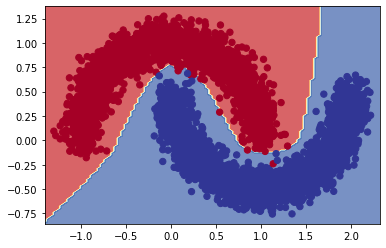

In [13]:
plot_decision_boundary(model, features, labels)